<a href="https://colab.research.google.com/github/sottohy/Weather-Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Reading the dataset and assigning the date column to be used as an index

weather = pd.read_csv("/content/drive/MyDrive/Weather Forecasting Project/weather.csv", index_col="DATE")
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1993-01-01,EG000062463,"HURGUADA, EG",0.0,NaN,63.0,73.0,52.0
1993-01-02,EG000062463,"HURGUADA, EG",0.0,NaN,61.0,71.0,NaN
1993-01-03,EG000062463,"HURGUADA, EG",NaN,NaN,62.0,NaN,54.0
1993-01-04,EG000062463,"HURGUADA, EG",NaN,NaN,61.0,NaN,56.0
1993-01-05,EG000062463,"HURGUADA, EG",0.0,NaN,62.0,65.0,NaN
...,...,...,...,...,...,...,...
1998-12-27,EG000624200,"BAHARIA, EG",NaN,NaN,NaN,63.0,46.0
1998-12-28,EG000624200,"BAHARIA, EG",NaN,NaN,NaN,67.0,52.0
1998-12-29,EG000624200,"BAHARIA, EG",NaN,NaN,NaN,65.0,44.0


In [ ]:
# Find the number of null values in each column then divide it by the total number of rows to give the %

null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.682654
SNWD       0.999991
TAVG       0.023379
TMAX       0.108668
TMIN       0.164527
dtype: float64

In [ ]:
# Drop the precepitation and snow features as tthe null % is too high

columns_to_drop = ['SNWD', 'PRCP']  # List of columns to drop
weather.drop(columns_to_drop, axis=1, inplace=True)
weather


,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
1993-01-01,EG000062463,"HURGUADA, EG",63.0,73.0,52.0
1993-01-02,EG000062463,"HURGUADA, EG",61.0,71.0,NaN
1993-01-03,EG000062463,"HURGUADA, EG",62.0,NaN,54.0
1993-01-04,EG000062463,"HURGUADA, EG",61.0,NaN,56.0
1993-01-05,EG000062463,"HURGUADA, EG",62.0,65.0,NaN
...,...,...,...,...,...
1998-12-27,EG000624200,"BAHARIA, EG",NaN,63.0,46.0
1998-12-28,EG000624200,"BAHARIA, EG",NaN,67.0,52.0
1998-12-29,EG000624200,"BAHARIA, EG",NaN,65.0,44.0


In [ ]:
# Drop rows with missing values

weather = weather.dropna()
weather

,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
1993-01-01,EG000062463,"HURGUADA, EG",63.0,73.0,52.0
1993-01-09,EG000062463,"HURGUADA, EG",61.0,67.0,46.0
1993-01-10,EG000062463,"HURGUADA, EG",60.0,68.0,51.0
1993-01-11,EG000062463,"HURGUADA, EG",58.0,64.0,51.0
1993-01-13,EG000062463,"HURGUADA, EG",55.0,65.0,51.0
...,...,...,...,...,...
2019-08-26,EG000062417,"SIWA, EG",93.0,107.0,81.0
2019-08-27,EG000062417,"SIWA, EG",94.0,107.0,80.0
2019-08-28,EG000062417,"SIWA, EG",91.0,106.0,78.0


In [ ]:
weather.apply(pd.isnull).sum()

STATION    0
NAME       0
TAVG       0
TMAX       0
TMIN       0
dtype: int64

In [ ]:
stations_to_keep = ['ALEXANDRIA INTERNATIONAL, EG']
#stations_to_keep = ['ALEXANDRIA INTERNATIONAL, EG', 'BAHARIA, EG', 'MINYA, EG', 'MERSA MATRUH, EG']
weather = weather[weather['NAME'].isin(stations_to_keep)]
weather


,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
1993-01-01,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",59.0,67.0,47.0
1993-01-03,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,66.0,43.0
1993-01-05,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,62.0,47.0
1993-01-06,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,61.0,46.0
1993-01-08,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",53.0,57.0,45.0
...,...,...,...,...,...
2019-12-23,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",60.0,70.0,50.0
2019-12-24,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",61.0,69.0,55.0
2019-12-27,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",61.0,65.0,52.0


In [ ]:
weather.dtypes

STATION     object
NAME        object
TAVG       float64
TMAX       float64
TMIN       float64
dtype: object

In [ ]:
weather.index

Index(['1993-01-01', '1993-01-03', '1993-01-05', '1993-01-06', '1993-01-08',
       '1993-01-09', '1993-01-10', '1993-01-11', '1993-01-12', '1993-01-17',
       ...
       '2019-12-16', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21',
       '2019-12-23', '2019-12-24', '2019-12-27', '2019-12-29', '2019-12-31'],
      dtype='object', name='DATE', length=5064)

In [ ]:
# Convert date to data type to date-time

weather.index = pd.to_datetime(weather.index)
weather.index


DatetimeIndex(['1993-01-01', '1993-01-03', '1993-01-05', '1993-01-06',
               '1993-01-08', '1993-01-09', '1993-01-10', '1993-01-11',
               '1993-01-12', '1993-01-17',
               ...
               '2019-12-16', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-21', '2019-12-23', '2019-12-24', '2019-12-27',
               '2019-12-29', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=5064, freq=None)

In [ ]:
# Count how many rows we have for each year then sort them based on years

weather.index.year.value_counts().sort_index()

DATE
1993    178
1994    190
1995    220
1996    231
1997    222
1998    176
1999    150
2000    161
2001    200
2002    210
2003    210
2004    205
2005    206
2006    189
2007    156
2008    173
2009    199
2010    217
2011    217
2012    176
2013    181
2014    196
2015    180
2016    131
2017    118
2018    187
2019    185
Name: count, dtype: int64

In [ ]:
weather

,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
1993-01-01,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",59.0,67.0,47.0
1993-01-03,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,66.0,43.0
1993-01-05,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,62.0,47.0
1993-01-06,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,61.0,46.0
1993-01-08,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",53.0,57.0,45.0
...,...,...,...,...,...
2019-12-23,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",60.0,70.0,50.0
2019-12-24,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",61.0,69.0,55.0
2019-12-27,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",61.0,65.0,52.0


In [ ]:
# Create a target column that has the tmax of the following day

weather["Target"] = weather.shift(-1)["TMAX"]

<ipython-input-105-08fd290ca70d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["Target"] = weather.shift(-1)["TMAX"]


In [ ]:
# Fill the last row

weather = weather.ffill()
weather

,STATION,NAME,TAVG,TMAX,TMIN,Target
DATE,,,,,,
1993-01-01,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",59.0,67.0,47.0,66.0
1993-01-03,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,66.0,43.0,62.0
1993-01-05,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,62.0,47.0,61.0
1993-01-06,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",54.0,61.0,46.0,57.0
1993-01-08,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",53.0,57.0,45.0,58.0
...,...,...,...,...,...,...
2019-12-23,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",60.0,70.0,50.0,69.0
2019-12-24,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",61.0,69.0,55.0,65.0
2019-12-27,EGM00062318,"ALEXANDRIA INTERNATIONAL, EG",61.0,65.0,52.0,66.0


In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1)

In [ ]:
# Create predictor columns, all columns except the provided list

columns = ["Target", "NAME", "STATION"]
predictors = weather.columns[~weather.columns.isin(columns)]
predictors

Index(['TAVG', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
# Use backtesting to account for the time series data (cross validation)

# Take 10 years of data before making predictions
# Take a set of predictions every 90 days

def backTest(weather, model, predictors, start=3650, step=90):
    # Each element is a df that has predictions for 90 days
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        # All the rows up to row i
        train = weather.iloc[:i, :]
        # Next 90 days (rows)
        test = weather.iloc[i:(i+step), :]

        model.fit(train[predictors], train["Target"])
        pred = model.predict(test[predictors]) # returns a numpy array
        pred = pd.Series(pred, index=test.index) # Convert to pandas to be easier to work with

        combined = pd.concat([test["Target"], pred], axis=1) # True values and predicted values
        combined.columns = ["Actual", "Prediction"] # Create the columns
        combined["Diff"] = (combined["Prediction"]-combined["Actual"]).abs() # Get the difference

        all_predictions.append(combined)

    return pd.concat(all_predictions)


In [ ]:
predictions = backTest(weather, rr, predictors)
predictions

,Actual,Prediction,Diff
DATE,,,
2011-09-18,86.0,85.984097,0.015903
2011-09-19,86.0,85.845176,0.154824
2011-09-23,86.0,86.296816,0.296816
2011-09-24,86.0,85.747903,0.252097
2011-09-25,89.0,86.321134,2.678866
...,...,...,...
2019-12-23,69.0,69.974389,0.974389
2019-12-24,65.0,70.205301,5.205301
2019-12-27,66.0,69.444454,3.444454


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["Actual"], predictions["Prediction"])


3.246481025033023

<Axes: xlabel='Diff'>

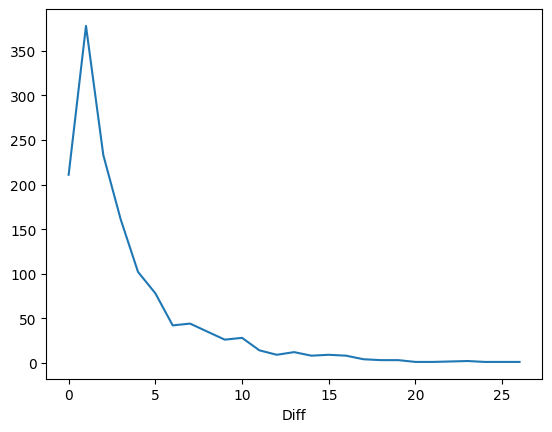

In [ ]:
predictions["Diff"].round().value_counts().sort_index().plot()

In [ ]:
cd/content/drive/MyDrive/Weather Forecasting Project

/content/drive/MyDrive/Weather Forecasting Project


In [ ]:
import pickle

pickle.dump(rr, open('model.pkl', 'wb'))